# Dự đoán giá trị ngôi nhà vùng Melbourne

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##  Exploratory Data Analysis (EDA)

In [204]:
df = pd.read_csv("data.csv")

In [205]:
df.shape

(34857, 21)

Dữ liệu gồm **21 features** và **34587 records**

In [206]:
# Đọc tên các features
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [207]:
# Một số records của dữ liệu
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [208]:
# Thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

<p>- 13 features: float64</p>
<p>- 8 features: object</p>

In [209]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Giá trị các features ta thấy dữ liệu khá hợp lý

### Phân phối biến Target

Trước tiên xem phân phối của biến 'Price'

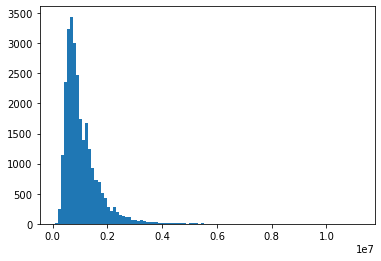

In [210]:
plt.hist(df['Price'].dropna(),bins=100)
plt.show()

Biến target đang không tuân theo phân phối chuẩn. Tôi sử dụng hàm log để chuyển đổi giá trị

In [106]:
df['Price'] = np.log1p(df['Price'].dropna())

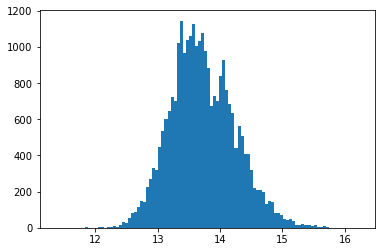

In [107]:
# Plot lại histogram

plt.hist(df['Price'], bins=100)
plt.show()

Bây giờ biến target đã tuân theo phân phối chuẩn. Ta tiếp tục làm sạch dữ liệu

## Làm sạch dữ liệu

In [108]:
# Xem dữ liệu bị thiếu
print(df.shape)
print(df.dropna().shape)

(34857, 21)
(8887, 21)


Khoảng 75% dữ liệu bị thiếu. 

In [109]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Các giá trị thiếu chủ yếu từ 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuild', 'Lattitude', 'Longtitude'

Đối với 'Price' bị thiếu 7610 dòng tương đương 25%. Đây là biến target cần được dự đoán nên tôi sẽ bỏ 25% dòng dữ liệu mà không sử dụng các phương pháp thay thế giá trị bị thiếu vì dữ liệu còn lại vẫn có thể chấp nhận được (khoảng 27,000 dòng).

Đối với các thuộc tính có kiểu dữ liệu là float bị thiếu dữ liệu còn lại tôi sẽ thực hiện thay thế NaN bằng giá trị trung bình dựa trên khoảng của 'Price'

In [110]:
# Xóa những dòng có thiếu giá trị Price
df = df[df.Price.notnull()]
# In ra kích thước của dữ liệu sau khi xóa
print(df.shape)

(27247, 21)


<strong style="font-size:17px">Xét khoảng giá trị cho 'Price'</strong>

In [118]:
df.Price.describe()

count    27247.000000
mean        13.722742
std          0.516969
min         11.350418
25%         13.361382
50%         13.676250
75%         14.074022
max         16.231424
Name: Price, dtype: float64

In [119]:
def classify_price(x):
    if x <= 13.361382:
        return 1
    elif x <= 13.676250:
        return 2
    elif x <= 14.074022:
        return 3
    else:
        return 4
    
df['cat_price'] = df.Price.apply(lambda x: classify_price(x))

In [120]:
# Xóa các features kiểu object 
obj_feas = []
for fea in df.columns.values:
    if df[fea].dtype == 'object':
        obj_feas.append(fea)
print(obj_feas)

df = df.drop(obj_feas,axis=1)
print(df.shape)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
(27247, 14)


<strong style="font-size:17px">Thay thế giá trị NaN</strong>
<p>Tôi sẽ thay thế NaN của các thuộc tính có kiểu dữ liệu là float dựa vào khoảng giá trị biến target 'Price'</p>

In [121]:
df.loc[(df['cat_price']==1)] = df.loc[(df['cat_price']==1)].apply(lambda x: x.fillna(x.median()))
df.loc[(df['cat_price']==2)] = df.loc[(df['cat_price']==2)].apply(lambda x: x.fillna(x.median()))
df.loc[(df['cat_price']==3)] = df.loc[(df['cat_price']==3)].apply(lambda x: x.fillna(x.median()))
df.loc[(df['cat_price']==4)] = df.loc[(df['cat_price']==4)].apply(lambda x: x.fillna(x.median()))

In [122]:
df.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
cat_price        0
dtype: int64

##  Visualization

### Price vs Rooms/ Bedroom2/ Bathroom

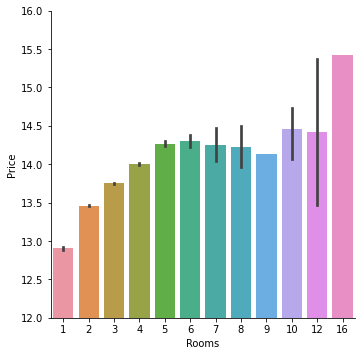

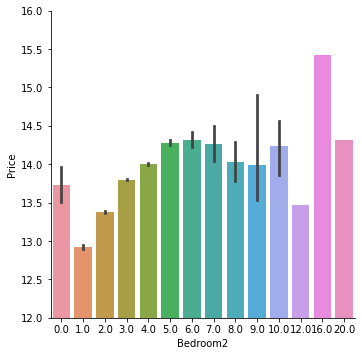

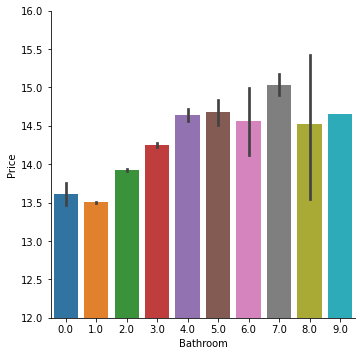

In [124]:
sns.catplot(x="Rooms", y="Price", data= df, kind="bar")
plt.ylim(12, 16)
sns.catplot(x="Bedroom2", y="Price", data= df, kind="bar")
plt.ylim(12, 16)
sns.catplot(x="Bathroom", y="Price", data= df, kind="bar")
plt.ylim(12, 16)
plt.show()

Biến 'Rooms' và 'Price' nhìn chung khá tương quan, khi 'Rooms' tăng 'Price' cũng có xu hướng tăng.

Mối quan hệ giữa 'Bedroom2' và 'Price' thì khá biến động đối với giá trị từ 6 đến 10 (có thể đồng biến hoặc nghịch biến), ngoài ra khi 'Bedroom2' bằng 12 'Price còn giảm mạnh.

Đối với biến 'Bathroom' và 'Price' đồng biến từ 1 đến 5, và biến động từ 6 trở lên. 

### Chọn thuộc tính huấn luyện mô hình

**Trong bài này tôi chỉ dự đoán giá trị của nhà bằng các thuộc tính có kiểu dữ liệu số thực**

<strong style="font-size:17px">Kiểm tra tương quan</strong>

Định nghĩa dữ liệu và biến target. 

Tôi sẽ kiểm tra tương quan và xóa các thuộc tính có độ tương quan cao hơn 0.9

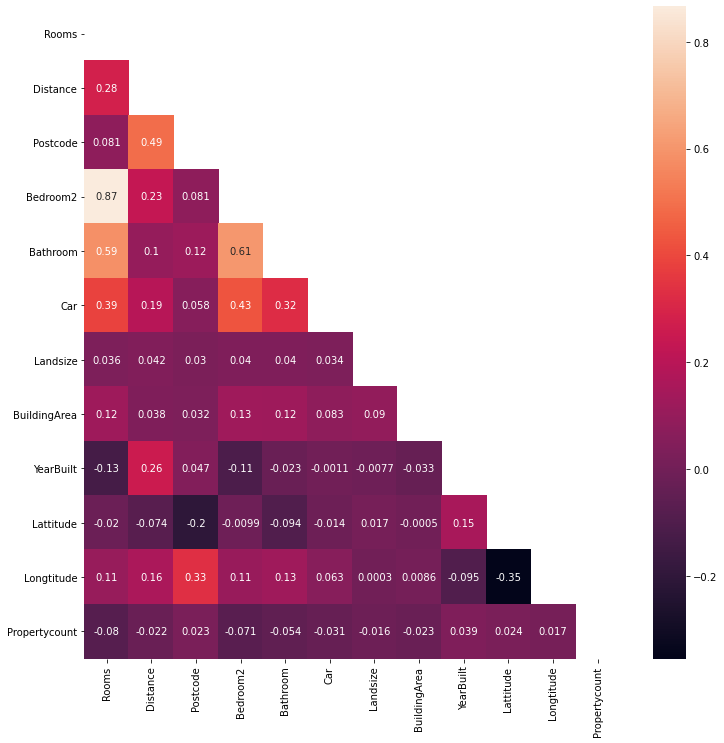

In [125]:
# Vì 'Price' là biến target nên không cần kiểm tra tương quan
drop_features = ['Price', 'cat_price']
data = df.drop(drop_features, axis=1)
target = df['Price']

fig, ax = plt.subplots(figsize=(12, 12)) 
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(data.corr(), mask= mask, ax= ax, annot= True)
plt.show()

In [126]:
# Tìm các thuộc tính có độ tương quan cao hơn 0.9 để xóa

corr_matrix = data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=4).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
# Xóa feature 
for i in to_drop:
    data = data.drop(i, axis=1)

data.shape

(27247, 12)

Không có feature nào có chỉ số tương quan lớn hơn 0.9 nên số thuộc tính đem huấn luyện mô hình là 12

## Huấn luyện mô hình với LinearRegression

Ở đây tôi sử dụng mô hình LinearRegression được hỗ trợ bởi thư viện sklearn.

Sau đó sử dụng 2 kỹ thuật kiểm tra độ chính xác của mô hình là holdout và K-fold

### Kỹ thuật holdout

In [178]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [141]:
target

1        14.207553
2        13.849913
4        14.197366
5        13.652993
6        14.285515
           ...    
34852    14.207553
34853    13.696728
34854    13.465955
34855    13.946540
34856    13.835314
Name: Price, Length: 27247, dtype: float64

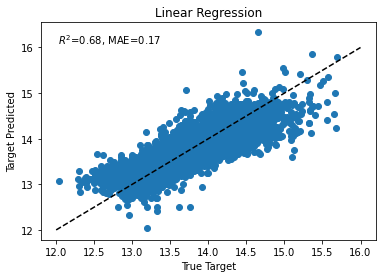

In [142]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

plt.scatter(y_test,y_pred)
plt.plot([12,16],[12,16],'--k')
plt.ylabel('Target Predicted')
plt.xlabel('True Target')
plt.title('Linear Regression')
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width*0.05, y0 + data_height * 0.9, r'$R^2$=%.2f, MAE=%.2f' % (reg.score(X_test, y_test), median_absolute_error(y_test, y_pred)))
plt.show()


### Kỹ thuật KFolds cross validation

Thực hiện KFold cross validation với k = 5 

In [143]:
rf_reg = LinearRegression()
cv_r2_scores_rf = cross_val_score(rf_reg, data, target,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[ 0.67031726  0.63989012  0.61861126 -0.13111631  0.6902755 ]
Mean 5-Fold R Squared: 0.4975955652461642


## Áp dụng PCA

### Kỹ thuật holdout

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7','pc 8','pc 9','pc 10','pc 11'])

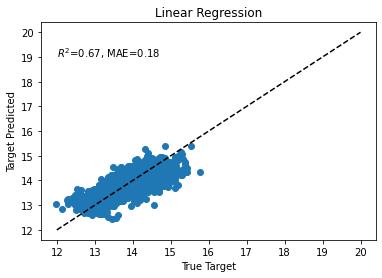

In [177]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(principalDf, target, test_size=0.2)
reg = LinearRegression()
reg.fit(X_pca_train, y_train)

y_pred = reg.predict(X_pca_test)

plt.scatter(y_test,y_pred)
plt.plot([12,20],[12,20],'--k')
plt.ylabel('Target Predicted')
plt.xlabel('True Target')
plt.title('Linear Regression')
plt.text(12, 19, r'$R^2$=%.2f, MAE=%.2f' % (reg.score(X_pca_test, y_test), median_absolute_error(y_test, y_pred)))
plt.show()

Ta thấy kĩ thuật PCA không làm cải thiện kết quả bài toán 

### Kỹ thuật KFold

In [172]:
rf_reg = LinearRegression()
cv_r2_scores_rf = cross_val_score(rf_reg, principalDf, target,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[ 0.66360967  0.63391152  0.61700471 -0.16730176  0.68147143]
Mean 5-Fold R Squared: 0.48573911470351805


## Visualize the residue and  homoscedasticity

In [199]:
resid = y_pred - y_test

In [329]:
resid

4426     0.293217
28972    0.312497
6019    -0.063115
33790    0.316022
11175   -0.048596
           ...   
4292    -0.268259
15537   -0.199622
33339   -0.100715
14630    0.105180
1813    -0.317129
Name: Price, Length: 5450, dtype: float64

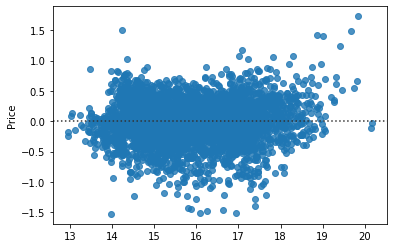

In [200]:
sns.residplot(y_pred, resid)
plt.show()

## Huấn luyện mô hình GradientBoostingRegressor

In [246]:
# Sử dụng tham số mặc định
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)

y_pred = GBR.predict(X_test)
print('R squared training set', GBR.score(X_train,y_train))
print('R squared training set',GBR.score(X_test,y_test))

R squared training set 0.8740669519701395
R squared training set 0.8626864523273325


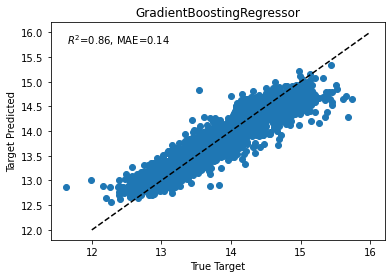

In [248]:

plt.scatter(y_test,y_pred)
plt.plot([12,16],[12,16],'--k')
plt.ylabel('Target Predicted')
plt.xlabel('True Target')
plt.title('GradientBoostingRegressor')
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width*0.05, y0 + data_height * 0.9, r'$R^2$=%.2f, MAE=%.2f' % (GBR.score(X_test, y_test), mean_absolute_error(y_test, y_pred)))
plt.show()

## Tune model

In [254]:
X_train

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2506,3,11.8,3105.0,3.0,1.0,2.0,530.0,122.0,1975.0,-37.77403,144.98835,4480.0
6285,5,7.4,3144.0,4.0,3.0,4.0,807.0,339.0,1920.0,-37.86840,145.03500,4675.0
10198,4,13.8,3107.0,4.0,2.0,2.0,675.0,181.0,1985.0,-37.76400,145.11450,5420.0
16883,3,18.0,3095.0,3.0,1.0,1.0,654.0,104.0,1985.0,-37.73209,145.13845,6990.0
10212,3,13.8,3107.0,3.0,1.0,2.0,799.0,174.0,1960.0,-37.76980,145.10280,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3512,2,9.2,3058.0,3.0,1.0,2.0,530.0,122.0,1975.0,-37.77403,144.98835,3445.0
13412,4,9.9,3044.0,4.0,3.0,4.0,590.0,185.0,1940.0,-37.73020,144.93570,7485.0
24233,3,16.1,3088.0,3.0,1.0,1.0,789.0,116.0,1989.0,-37.70216,145.12039,1390.0
18335,3,12.4,3107.0,3.0,2.0,3.0,725.0,185.0,1940.0,-37.76616,145.11207,5420.0


In [250]:
# scale X_train values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

In [255]:
X_train_scaled

array([[ 0.01208665,  0.07929346, -0.07931696, ...,  0.36159904,
        -0.0636396 , -0.68688079],
       [ 2.10298139, -0.56944036,  0.27390772, ..., -0.79835211,
         0.37344508, -0.64345673],
       [ 1.05753402,  0.37417247, -0.06120287, ...,  0.48488302,
         1.1183161 , -0.47755453],
       ...,
       [ 0.01208665,  0.71328333, -0.2332867 , ...,  1.24499088,
         1.17350214, -1.37498519],
       [ 0.01208665,  0.16775716, -0.06120287, ...,  0.45833333,
         1.09554834, -0.47755453],
       [ 0.01208665,  0.62481963,  0.48221972, ..., -1.66232335,
         0.83638945, -0.86235855]])

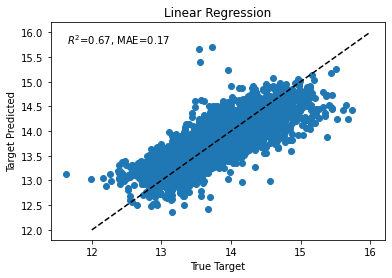

In [257]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)


plt.scatter(y_test,y_pred)
plt.plot([12,16],[12,16],'--k')
plt.ylabel('Target Predicted')
plt.xlabel('True Target')
plt.title('Linear Regression')
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width*0.05, y0 + data_height * 0.9, r'$R^2$=%.2f, MAE=%.2f' % (reg.score(X_test_scaled, y_test), median_absolute_error(y_test, y_pred)))
plt.show()

### Hyperparameter Tuning

Sử dụng mô hình GradientBoostingRegressor để tinh chỉnh siêu tham số

In [234]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

In [237]:
learning_rate=[0.01]
alpha=[0.01,0.03,0.05,0.1,0.3, 0.9]
n_estimators=[int(x) for x in np.linspace(start = 10, stop = 500, num = 4)]
max_depth=[int(x) for x in np.linspace(start = 3, stop = 15, num = 4)]
max_depth.append(None)
min_samples_split=[int(x) for x in np.linspace(start = 2, stop = 5, num = 4)]
min_samples_leaf=[int(x) for x in np.linspace(start = 1, stop = 4, num = 4)]
max_features=['auto', 'sqrt']

# Create the random grid
param_grid = {'learning_rate':learning_rate,
              'alpha':alpha,
              'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
             }

# Initialize and fit the model.
model = GradientBoostingRegressor()
model = RandomizedSearchCV(model, param_grid, cv=3)
model.fit(X_train_sample, y_train_sample)

# get the best parameters
best_params = model.best_params_
print(best_params)

{'n_estimators': 336, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 11, 'learning_rate': 0.01, 'alpha': 0.01}


In [258]:
model_best = GradientBoostingRegressor(**best_params)
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)


print('\n\nR-squared test set:')
print(model_best.score(X_test, y_test))
print('\nMAE test set: ')
print(mean_absolute_error(y_test, y_pred))
print('\nMSE test set: ')
print(mean_squared_error(y_test, y_pred))



R-squared test set:
0.9015187815196958

MAE test set: 
0.11793699269171924

MSE test set: 
0.026242269214965357


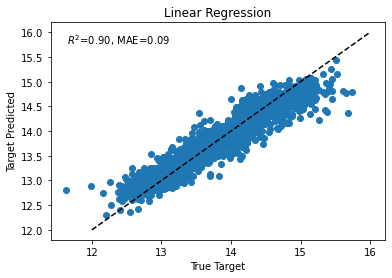

In [239]:
plt.scatter(y_test,y_pred)
plt.plot([12,16],[12,16],'--k')
plt.ylabel('Target Predicted')
plt.xlabel('True Target')
plt.title('Linear Regression')
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width*0.05, y0 + data_height * 0.9, r'$R^2$=%.2f, MAE=%.2f' % (model_best.score(X_test, y_test), median_absolute_error(y_test, y_pred)))
plt.show()


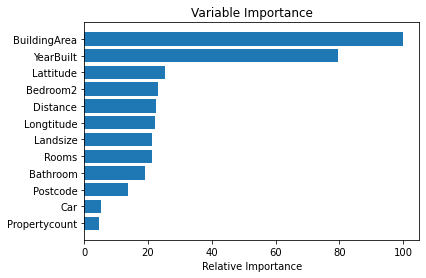

In [259]:
feature_importance = model_best.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, data.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [260]:
print(feature_importance)

[ 21.2771766   22.41888425  13.66067666  23.2044377   18.9126835
   5.12014485  21.3536817  100.          79.43435426  25.32365599
  22.23643238   4.57888817]


In [261]:
sorted_idx

array([11,  5,  2,  4,  0,  6, 10,  1,  3,  9,  8,  7], dtype=int64)

## Kết luận

Kết quả tối ưu mô hình GradientBoostingRegressor

In [271]:
print('\n\nR squared train set:')
print(model_best.score(X_train, y_train))
print('\nMAE train set: ')
print(mean_absolute_error(y_train, model_best.predict(X_train)))
print('\nMSE train set: ')
print(mean_squared_error(y_train, model_best.predict(X_train)))

print('\n\nR squared test set:')
print(model_best.score(X_test, y_test))
print('\nMAE test set: ')
print(mean_absolute_error(y_test, model_best.predict(X_test)))
print('\nMSE test set: ')
print(mean_squared_error(y_test, model_best.predict(X_test)))

top_5_features = data.columns.values[sorted_idx[-1:4:-1]]
print('\nCac thuoc tinh quan trong: ')
print(*top_5_features)



R squared train set:
0.9584637782663746

MAE train set: 
0.07824169273620914

MSE train set: 
0.01110841132675941


R squared test set:
0.9015187815196958

MAE test set: 
0.11793699269171924

MSE test set: 
0.026242269214965357

Cac thuoc tinh quan trong: 
BuildingArea YearBuilt Lattitude Bedroom2 Distance Longtitude Landsize
